# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Usuario_1\AppData\Local\Temp\ipykernel_22780\131226104.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
elteams=pd.read_csv("actual.csv")
ecteams=pd.read_excel("ec2023.xlsx", index_col=False)
competition=pd.read_csv("competition.csv")

In [4]:
import warnings
warnings.filterwarnings("ignore")

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [5]:
competition.sample()

,Competition,Localscore,Visitantescore,Plusminus,Ganador
166,Euroleague,68,83,-15,Visitante


In [6]:
# 1 How many matches have been in each competition?
competition.Competition.value_counts()

Competition
Euroleague    225
Eurocup       170
Name: count, dtype: int64

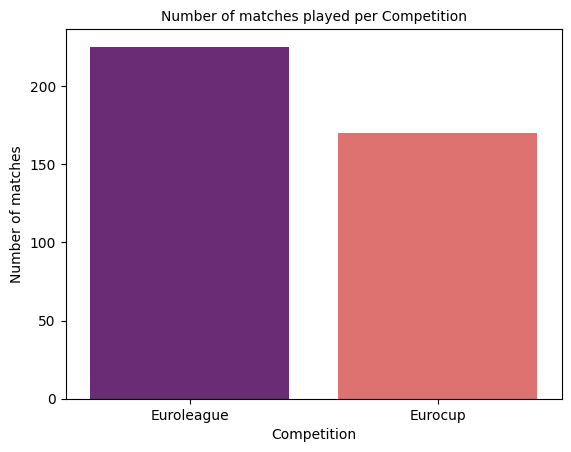

In [7]:
sns.countplot(data=competition, x="Competition", palette="magma");
plt.ylabel("Number of matches")
plt.title("Number of matches played per Competition", size=10);

In [8]:
# 2 What are the maximum points that a local team has scored per competition?
competition[["Localscore", "Competition"]].groupby("Competition").max()

,Localscore
Competition,
Eurocup,120
Euroleague,130


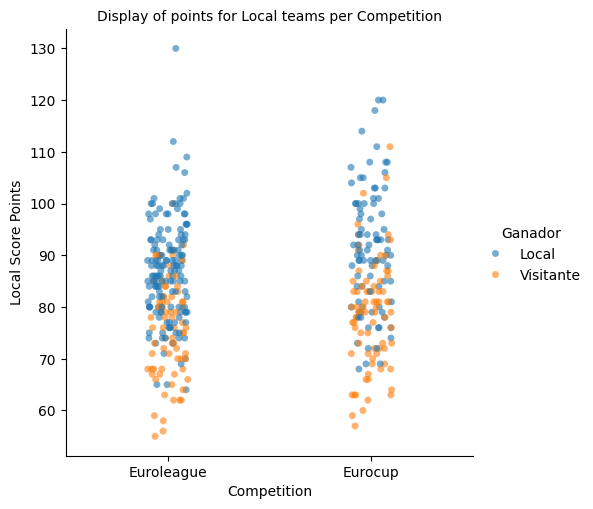

In [9]:
sns.catplot(data=competition, x="Competition", y="Localscore",hue="Ganador", alpha=0.6, jitter=True);
plt.ylabel("Local Score Points")
plt.title("Display of points for Local teams per Competition", size=10);

In [10]:
# And the road team as well.
competition[["Visitantescore", "Competition"]].groupby("Competition").max()

,Visitantescore
Competition,
Eurocup,114
Euroleague,126


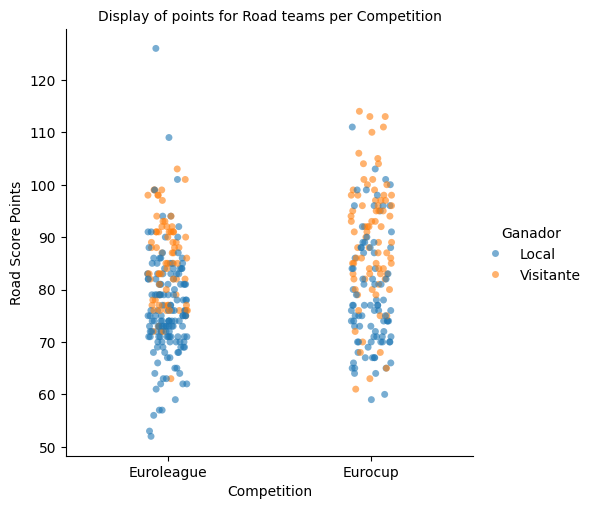

In [11]:
sns.catplot(data=competition, x="Competition", y="Visitantescore",hue="Ganador", alpha=0.6, jitter=True);
plt.ylabel("Road Score Points")
plt.title("Display of points for Road teams per Competition", size=10);

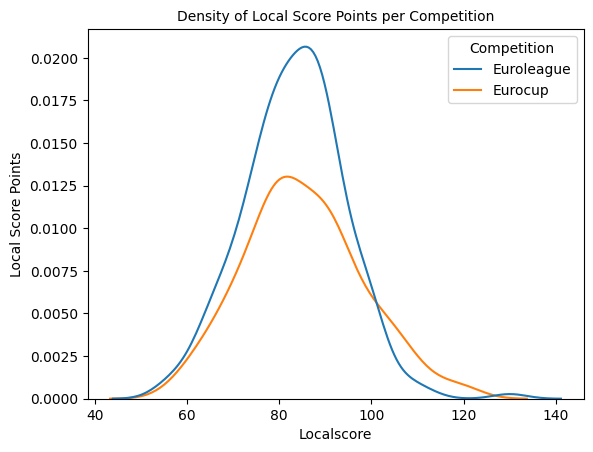

In [27]:
# 3 Do the same operations with the average points (per competition)
sns.kdeplot(x=competition.Localscore, hue=competition.Competition)
plt.ylabel("Density")
plt.ylabel("Local Score Points")
plt.title("Density of Local Score Points per Competition", size=10);

In [25]:
competition[["Localscore", "Competition"]].groupby("Competition").mean().round(2)

,Localscore
Competition,
Eurocup,85.24
Euroleague,83.28


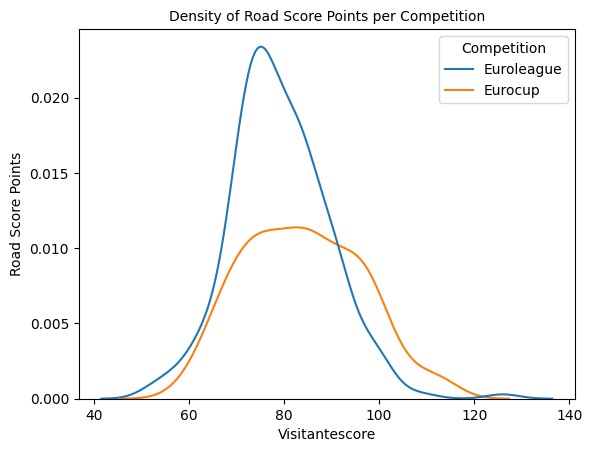

In [28]:
sns.kdeplot(x=competition.Visitantescore, hue=competition.Competition)
plt.ylabel("Density")
plt.ylabel("Road Score Points")
plt.title("Density of Road Score Points per Competition", size=10);

In [14]:
# And the road team as well.
competition[["Visitantescore", "Competition"]].groupby("Competition").mean().round(2)

,Visitantescore
Competition,
Eurocup,83.96
Euroleague,79.17


In [15]:
# 4 Can you tell me the maximum difference that has been in a match, splitted by competition?
competition['Plusminusabsolute'] = np.where(competition['Plusminus'] >= 0, competition['Plusminus'], -competition['Plusminus'])

In [16]:
# - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
competition[["Plusminusabsolute", "Competition"]].groupby("Competition").max()

,Plusminusabsolute
Competition,
Eurocup,39
Euroleague,39


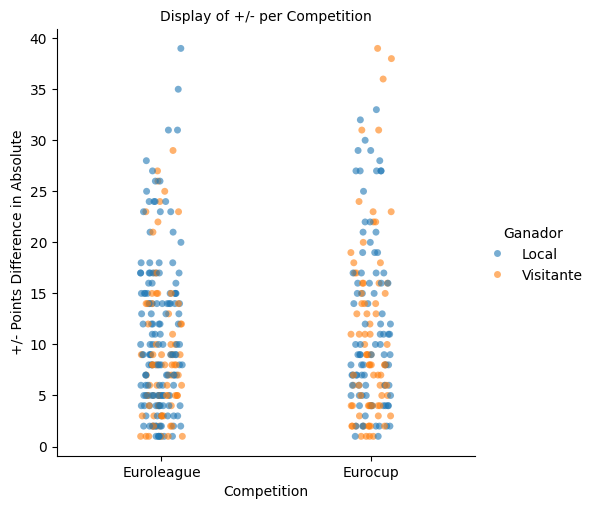

In [17]:
sns.catplot(data=competition, x="Competition", y="Plusminusabsolute",hue="Ganador", alpha=0.6, jitter=True);
plt.ylabel("+/- Points Difference in Absolute")
plt.title("Display of +/- per Competition", size=10);

In [18]:
# 5 Also grouped by competition, give me the number of victories of the Locals and the Visitors
pd.crosstab(competition['Competition'], competition['Ganador'])

Ganador,Local,Visitante
Competition,,
Eurocup,90,80
Euroleague,150,75


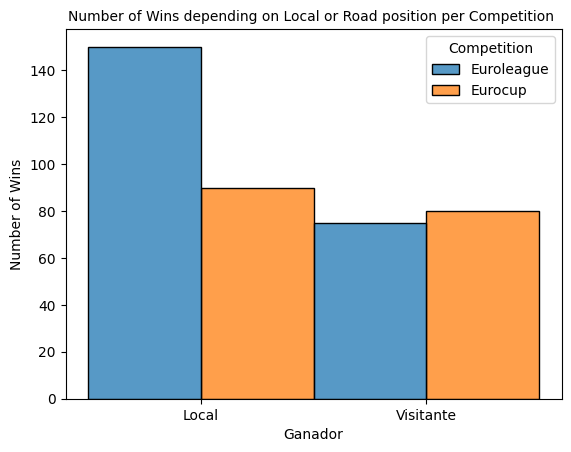

In [19]:
sns.histplot(data=competition, x="Ganador", hue="Competition", multiple="dodge", bins=15)
plt.ylabel("Number of Wins")
plt.title("Number of Wins depending on Local or Road position per Competition ", size=10);

# More Graphs!

Create one of each of the following graph types, with variables of your choice, and add at least two comments describing something interesting of each graph:

1. Comparison Charts (Barplot, Scatterplot or Countplot)
2. Histogram
3. Stack columns Chart
4. Correlation Matrix/Heatmap
5. Trends (Line Charts)

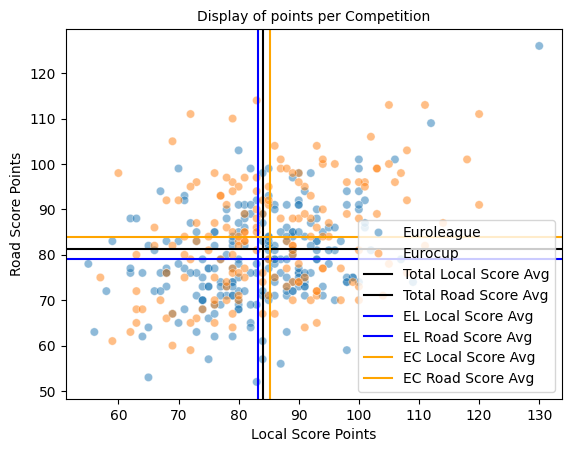

In [20]:
# Comparison Chart
competition_el = competition[competition['Competition'] == 'Euroleague']
competition_ec = competition[competition['Competition'] == 'Eurocup']

points_game = sns.scatterplot(x="Localscore", y="Visitantescore", hue="Competition", alpha=0.5 ,data=competition)
points_game.axvline(x=competition.Localscore.mean(), c="black", label="Total Local Score Avg")
points_game.axhline(y=competition.Visitantescore.mean(), c="black", label="Total Road Score Avg")
points_game.axvline(x=competition_el.Localscore.mean(), c="blue", label="EL Local Score Avg")
points_game.axhline(y=competition_el.Visitantescore.mean(), c="blue", label="EL Road Score Avg")
points_game.axvline(x=competition_ec.Localscore.mean(), c="orange", label="EC Local Score Avg")
points_game.axhline(y=competition_ec.Visitantescore.mean(), c="orange", label="EC Road Score Avg")
plt.legend()
plt.xlabel("Local Score Points")
plt.ylabel("Road Score Points")
plt.title("Display of points per Competition", size=10);

**Your comments here**
- Eurocup score averages for Local Teams are higher than for Euroleagues Local Teams.
- Euroleague score averages for Road Teams are lower than for Eurocups Road Teams.

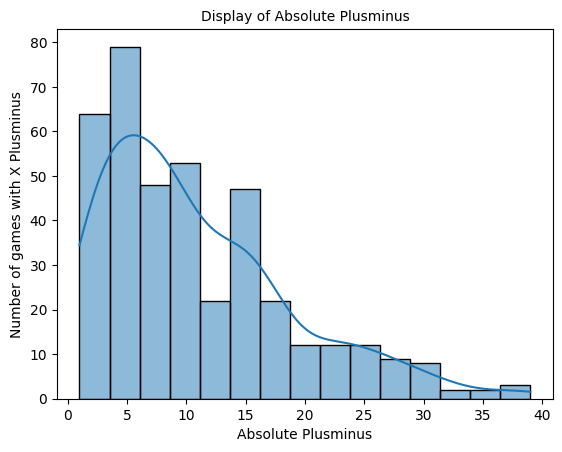

In [37]:
# Histogram
sns.histplot(x=competition.Plusminusabsolute.dropna(), bins=15, kde=True)
plt.xlabel("Absolute Plusminus")
plt.ylabel("Number of games with X Plusminus")
plt.title("Display of Absolute Plusminus", size=10);

**Your comments here**
- The maximum Plusminus absolute value is between 35 and 40 points.
- We can assure the most repeated value of Plusminus absolute is 5.

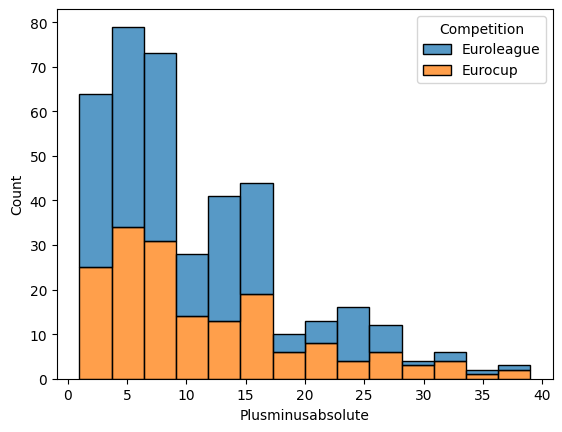

In [50]:
# Stacked columns
sns.histplot(data=competition, x="Plusminusabsolute", hue="Competition", multiple="stack");

**Your comments here**
- The Eurocup teams have had more presence on the Highest Plusminus absolute scores (Outliers).
- The Euroleauge teams have more presence in the most competed matches, which are also the most in both competitions.

In [46]:
# Correlation / Heatmap
mapeo = {'Local': 1, 'Visitante': 0, 'Euroleague': 1, 'Eurocup': 0,}

competition_numerica = competition.applymap(lambda x: mapeo.get(x, x))

corr = competition_numerica.corr()

In [47]:
corr = competition_numerica.corr()

In [49]:
corr

,Competition,Localscore,Visitantescore,Plusminus,Ganador,Plusminusabsolute
Competition,1.000000,-0.082128,-0.207027,0.106620,0.139178,-0.068050
Localscore,-0.082128,1.000000,0.356716,0.583318,0.466063,0.134643
Visitantescore,-0.207027,0.356716,1.000000,-0.550730,-0.436206,-0.074829
Plusminus,0.106620,0.583318,-0.550730,1.000000,0.795666,0.185358
Ganador,0.139178,0.466063,-0.436206,0.795666,1.000000,0.071245
Plusminusabsolute,-0.068050,0.134643,-0.074829,0.185358,0.071245,1.000000


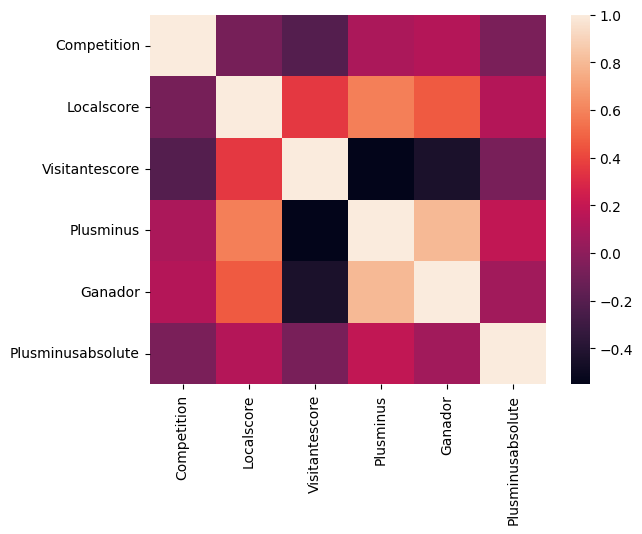

In [48]:
sns.heatmap(corr);

**Your comments here**
- Absoluteplusminus has better correlation when the winning Team is Local. 
- Most of the Absoluteplusminus records come from high Localscore points rather than Road.

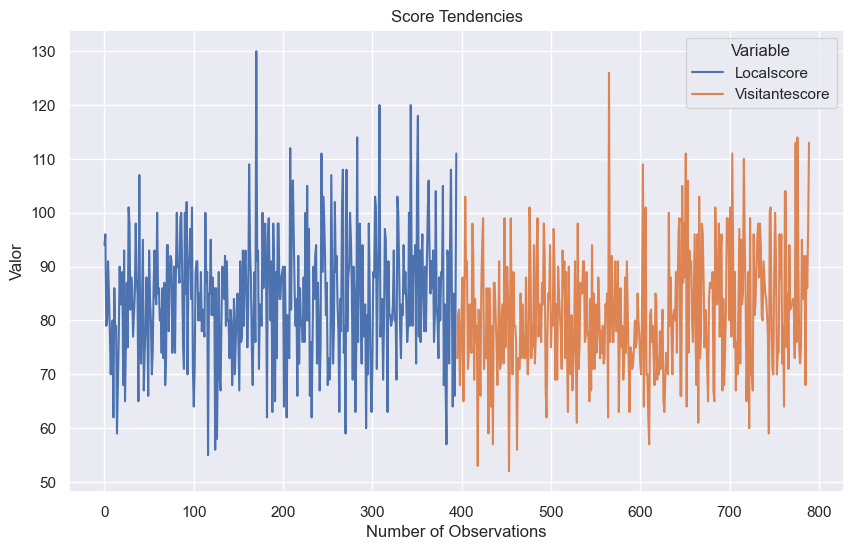

In [66]:
# Trends
columns_of_interest = ['Localscore', 'Visitantescore']

melted_df = competition.melt(value_vars=columns_of_interest, var_name='Variable', value_name='Valor')

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=melted_df, x=melted_df.index, y='Valor', hue='Variable')

plt.title('Score Tendencies')
plt.xlabel('Number of Observations')
plt.ylabel('Valor')

plt.show()


**Your comments here**
- The highest number of score is made by a Local Team.
- The lowest number of score is made by an Away Team.